Linear Regression Diagnostic in Python with StatsModels
Wednesday. May 02, 2018 
https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/

While linear regression is a pretty simple task, there are several assumptions for the model that we may want to validate. I follow the regression diagnostic here, trying to justify four principal assumptions, namely LINE in Python:

    Lineearity
    Independence (This is probably more serious for time series. I’ll pass it for now)
    Normality
    Equal variance (or homoscedasticity)

I learnt this abbreviation of linear regression assumptions when I was taking a course on correlation and regression taught by Walter Vispoel at UIowa. Really helped me to remember these four little things!

In fact, statsmodels itself contains useful modules for regression diagnostics. In addition to those, I want to go with somewhat manual yet very simple ways for more flexible visualizations.

Linear regression

Let’s go with the depression data. More toy datasets can be found here. For simplicity, I randomly picked 3 columns.

In [36]:
import numpy as np
import statsmodels.api as sm
from patsy import dmatrices
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import os


In [37]:
os.chdir(r'C:\\Users\\Anthony\\Documents\\MLDatasets\\')

In [38]:
# df = statsmodels.datasets.get_rdataset("Ginzberg", "car").data
df = pd.read_csv('Ginzberg.csv')
df = df[['adjdep', 'adjfatal', 'adjsimp']]
df.head(2)

,adjdep,adjfatal,adjsimp
0,0.41865,0.10673,0.75934
1,0.51688,0.99915,0.72717


Linear regression is simple, with statsmodels. We are able to use R style regression formula.

In [39]:
import statsmodels.formula.api as smf
reg = smf.ols('adjdep ~ adjfatal + adjsimp', data=df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 adjdep   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     30.19
Date:                Sat, 30 Jan 2021   Prob (F-statistic):           1.82e-10
Time:                        11:21:19   Log-Likelihood:                -35.735
No. Observations:                  82   AIC:                             77.47
Df Residuals:                      79   BIC:                             84.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2492      0.105      2.365      0.021       0.039       0.459
adjfatal       0.3845      0.100      3.829      0.000       0.185       0.584
adjsimp        0.3663      0.100      3.649      0.000       0.166       0.566
==============================================================================
Omnibus:                       10.510   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.561
Skew:                           0.836   Prob(JB):                      0.00509
Kurtosis:                       3.542   Cond. No.                         5.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Regression assumptions

Now let’s try to validate the four assumptions one by one

Linearity & Equal variance

Both can be tested by plotting residuals vs. predictions, where residuals are prediction errors.

In [40]:
pred_val = reg.fittedvalues.copy()
true_val = df['adjdep'].values.copy()
residual = true_val - pred_val

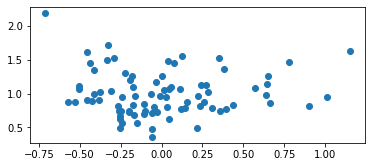

In [41]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

It seems like the corresponding residual plot is reasonably random. To confirm that, let’s go with a hypothesis test, Harvey-Collier multiplier test, for linearity

In [42]:
import statsmodels.stats.api as sms
sms.linear_harvey_collier(reg)

Ttest_1sampResult(statistic=4.990214882983253, pvalue=3.581697397190254e-06)

Several tests exist for equal variance, with different alternative hypotheses. Let’s go with Breusch-Pagan test as an example. More can be found here. Small p-value (pval below) shows that there is violation of homoscedasticity.

In [43]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(residual, df[['adjfatal', 'adjsimp']])
pval, f_pval

(6.448482473014074e-08, 2.213073839603521e-08)

Usually assumption violations are not independent of each other. Having one violations may lead to another. In this case, we see that both linearity and homoscedasticity are not met. Possible data transformation such as log, Box-Cox power transformation, and other fixes may be needed to get a better regression outcome.

Normality

We can apply normal probability plot to assess how the data (error) depart from normality visually:

0.9523990893322949

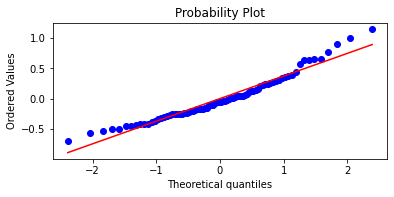

In [44]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

The good fit indicates that normality is a reasonable approximation.
